In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


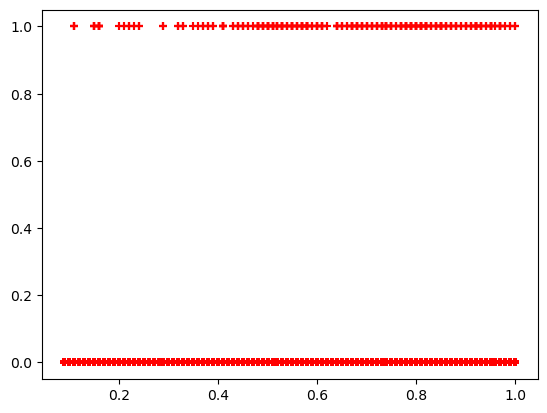

In [5]:
plt.scatter(df.satisfaction_level,df.promotion_last_5years,marker='+',color='red')
plt.show()

In [8]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [13]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [15]:
df_numeric = df.select_dtypes(include=['number'])
df.groupby('left')[df_numeric.columns].mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


In [19]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='salary'>

In [20]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

In [21]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [27]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary", dtype=int)
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [28]:
df_with_dummies = pd.concat([subdf, salary_dummies], axis='columns')
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [29]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [31]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [32]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [33]:
y = df.left

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [35]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
12349,0.40,149,0,0,0,1
13003,0.61,104,0,0,0,1
4305,0.77,254,0,0,0,1
14807,0.86,222,0,0,1,0
14718,0.39,158,0,0,1,0
...,...,...,...,...,...,...
5870,0.32,136,0,0,0,1
13222,0.21,238,0,0,0,1
6158,0.60,154,0,0,1,0
7561,0.71,245,0,0,0,1


In [36]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
12949,0.68,270,0,1,0,0
12380,0.44,156,0,0,0,1
4424,0.88,250,0,0,0,1
7182,1.00,268,0,0,0,1
7779,0.71,201,0,0,1,0
...,...,...,...,...,...,...
6135,0.68,144,0,0,0,1
7441,0.92,191,0,0,0,1
10681,0.82,180,0,0,1,0
1362,0.40,129,0,0,0,1


In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [38]:
model.fit(X_train,y_train)

LogisticRegression()

In [39]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [40]:
model.score(X_test,y_test)

0.7764761904761904

In [41]:
model.predict_proba(X_test)

array([[0.71832905, 0.28167095],
       [0.86501768, 0.13498232],
       [0.88902335, 0.11097665],
       ...,
       [0.73954859, 0.26045141],
       [0.8669589 , 0.1330411 ],
       [0.485342  , 0.514658  ]])